In [174]:
import pandas as pd

In [175]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [176]:
df.shape

(200, 5)

In [177]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [178]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [179]:
#KMeans
from sklearn.cluster import KMeans

In [180]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [181]:
df = df.rename(columns={
    'Annual Income (k$)':'Anl_income',
    'Spending Score (1-100)': 'Spend_score'
})

In [182]:
df.head()

,CustomerID,Gender,Age,Anl_income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [183]:
x = df[['Anl_income', 'Spend_score']]

In [184]:
from sklearn.preprocessing import StandardScaler
sl = StandardScaler()
x_s = sl.fit_transform(x)

In [185]:
kmns = KMeans(n_clusters = 5, random_state= 7)
kmns.fit(x_s)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,7
,copy_x,True
,algorithm,'lloyd'


In [186]:
label = kmns.labels_

In [187]:
import matplotlib.pyplot as plt


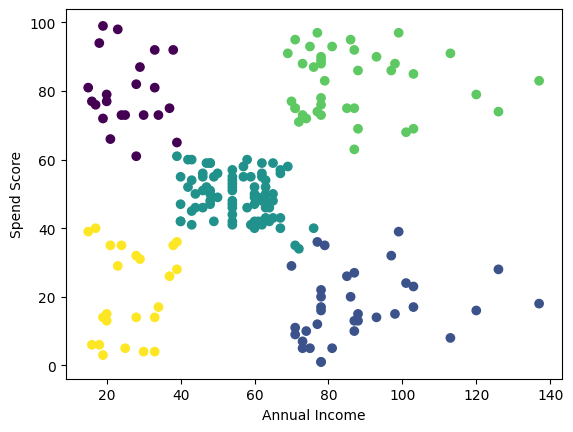

In [188]:
plt.scatter(x.Anl_income, x.Spend_score, c=label)
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.show()

In [189]:
kmns.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

In [190]:
df['Cluster'] = label
df

,CustomerID,Gender,Age,Anl_income,Spend_score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [191]:
kmns.predict([[20,60]])

array([3], dtype=int32)

In [192]:
WCSS (Within Clusters sum of squares)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (133966710.py, line 1)

In [193]:
pd.DataFrame(x_s, columns = x.columns)

,Anl_income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [194]:
# Elbow method
# cluster = 2 to 10

In [195]:
wcss = []
for i in range(2,11):
    kcluster = KMeans(n_clusters = i, random_state = 7)
    kcluster.fit(x_s)

    inertia = kcluster.inertia_
    wcss.append(inertia)

In [196]:
wcss

[270.15590350727916,
 157.70400815035947,
 109.22822707921345,
 65.56840815571681,
 57.381747460227864,
 47.33848673638822,
 44.107855408403196,
 41.791762242706056,
 32.164729778753326]

In [197]:
import matplotlib.pyplot as plt

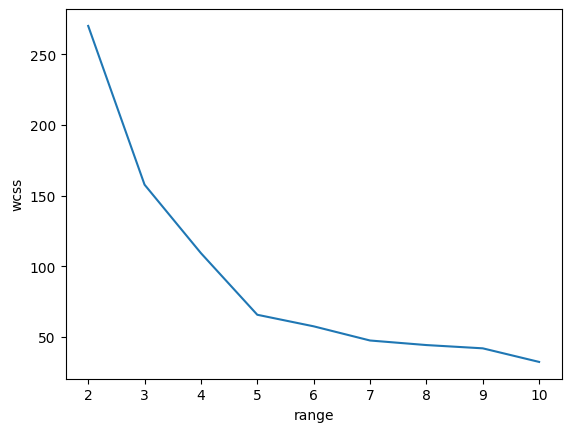

In [198]:
plt.plot(range(2,11), wcss)
plt.xlabel('range')
plt.ylabel('wcss')
plt.show()

In [199]:
df.head()

,CustomerID,Gender,Age,Anl_income,Spend_score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [200]:
x = df[['Age','Spend_score', 'Anl_income']]
df.dtypes

CustomerID      int64
Gender         object
Age             int64
Anl_income      int64
Spend_score     int64
Cluster         int32
dtype: object

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
sl = StandardScaler()
x_s = sl.fit_transform(x)

In [203]:
wcss = []
for i in range(2,11):
    kcluster = KMeans(n_clusters = i, random_state = 7)
    kcluster.fit(x_s)

    wcss.append(kcluster.inertia_)
    

In [204]:
wcss

[389.3861889564372,
 304.9523066308922,
 205.22514747675916,
 168.24758017556837,
 133.88887021131026,
 133.56204106350026,
 107.54814732312754,
 104.0108332524051,
 93.54174223195815]

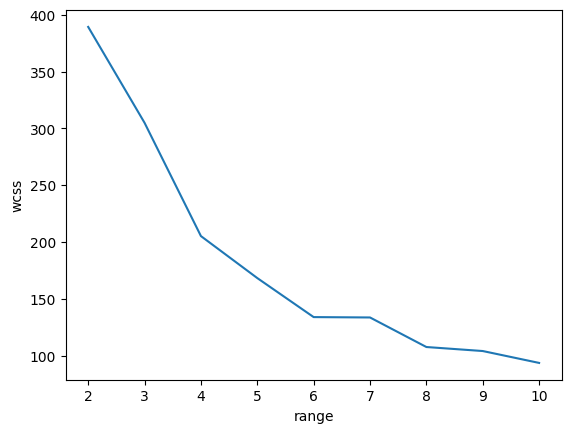

In [205]:
plt.plot(range(2,11),wcss)
plt.xlabel('range')
plt.ylabel('wcss')
plt.show()

In [206]:
pip install scipy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [207]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [208]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [209]:
df = df.rename(columns={
    'Annual Income (k$)':'Annual Income',
    'Spending Score (1-100)':'Spending Score'
})

In [210]:
df.to_csv('mall_data.csv')

In [211]:
df = pd.read_csv('mall_data.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income,Spending Score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [212]:
x = df[['Annual Income','Spending Score']]

In [213]:
sl = StandardScaler()
xs = sl.fit_transform(x)

In [214]:
# Linkage
z = linkage(xs, method = 'average')

In [215]:
import matplotlib.pyplot as plt

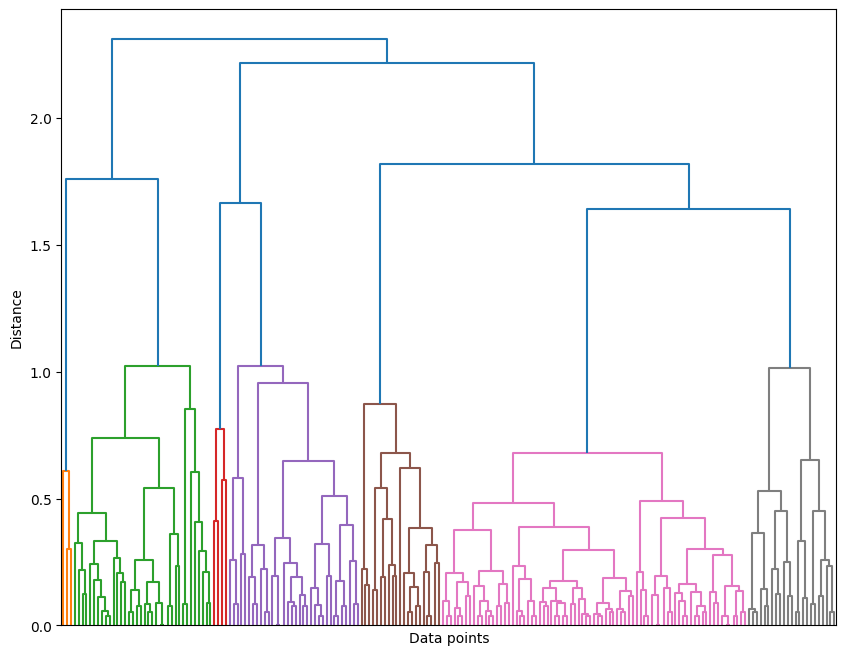

In [216]:
# Dendogram
plt.figure(figsize = (10,8))
dendrogram(z, no_labels=True)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [217]:
hcluster = AgglomerativeClustering(n_clusters = 7, linkage='average')
hcluster.fit(xs)

,n_clusters,7
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,False


In [218]:
label = hcluster.labels_
label

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 6,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 5, 4, 5, 4,
       5, 4])

In [219]:
df['Cluster'] = label

In [220]:
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,0,1,Male,19,15,39,1
1,1,2,Male,21,15,81,3
2,2,3,Female,20,16,6,1
3,3,4,Female,23,16,77,3
4,4,5,Female,31,17,40,1


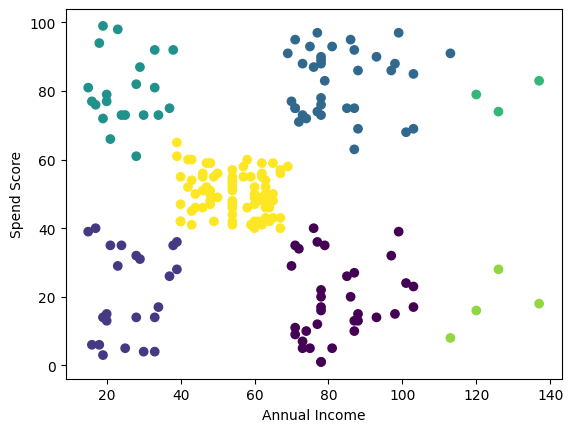

In [221]:
plt.scatter(x['Annual Income'], x['Spending Score'], c=label)
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.show()

In [222]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [223]:
df = pd.read_csv('mall_data.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income,Spending Score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [224]:
x = df[['Annual Income', 'Spending Score']]

In [225]:
sl = StandardScaler()
xs = sl.fit_transform(x)

In [226]:
z = linkage(xs, method='ward')

In [227]:
import matplotlib.pyplot as plt

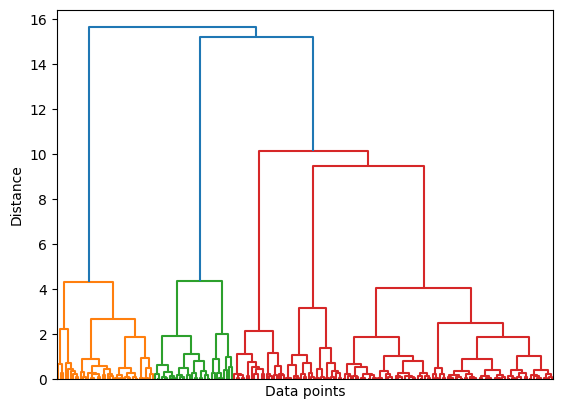

In [228]:
dendrogram(z , no_labels = True)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [229]:
hcluster = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
hcluster.fit(xs)

,n_clusters,5
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


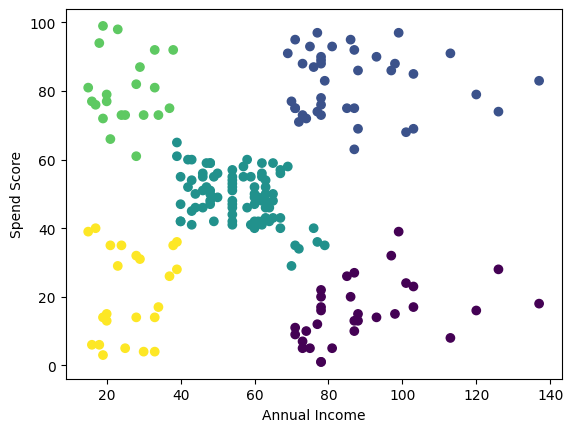

In [230]:
plt.scatter(x['Annual Income'], x['Spending Score'], c=hcluster.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.show()


In [231]:
from sklearn.metrics import silhouette_score

In [232]:
# silhouette score(data, labels)
score = silhouette_score(xs, hcluster.labels_)
print(score)

0.5538089226688662


In [299]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [300]:
df = pd.read_csv('mall_data.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income,Spending Score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [301]:
x = df[['Annual Income', 'Spending Score']]

In [302]:
x.head()


,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [303]:
# Scaling
sl = StandardScaler()
xs = sl.fit_transform(x)

In [304]:
# Model
# eps = 0.5
# min_samples = 5
dbcluster = DBSCAN(eps=0.4,min_samples = 3)
dbcluster.fit(xs)

,eps,0.4
,min_samples,3
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [305]:
# Labes
label = dbcluster.labels_

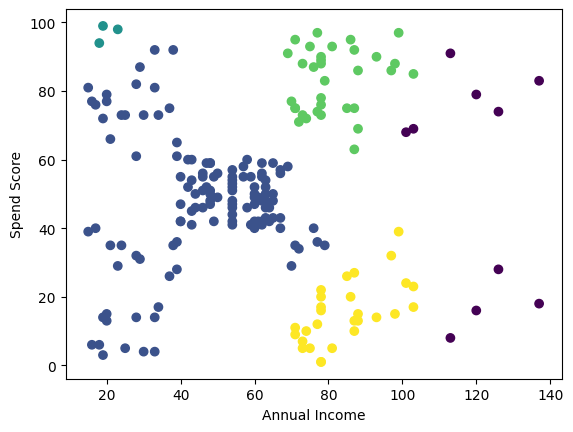

In [306]:
plt.scatter(x[['Annual Income']], x[['Spending Score']], c = label)
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.show()

In [307]:
xs

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [308]:
x_df = pd.DataFrame(xs, columns= x.columns)
x_df.head()

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [309]:
from sklearn.neighbors import NearestNeighbors

In [310]:
nearest_dist = NearestNeighbors(n_neighbors = 4)
nearest_dist.fit(xs)

,n_neighbors,4
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,n_jobs,None


In [311]:
distance, index = nearest_dist.kneighbors(xs)
distance

array([[0.        , 0.08564307, 0.27669913, 0.37699224],
       [0.        , 0.15990848, 0.20603662, 0.20857963],
       [0.        , 0.07633886, 0.16332841, 0.31170347],
       [0.        , 0.0544428 , 0.15267772, 0.15990848],
       [0.        , 0.08564307, 0.24695814, 0.33025172],
       [0.        , 0.0544428 , 0.12091014, 0.16332841],
       [0.        , 0.07633886, 0.12255989, 0.26999162],
       [0.        , 0.19782504, 0.24604156, 0.50013409],
       [0.        , 0.12255989, 0.16332841, 0.24182028],
       [0.        , 0.17303595, 0.19475561, 0.19782504],
       [0.        , 0.0544428 , 0.0544428 , 0.31290921],
       [0.        , 0.15753602, 0.19782504, 0.59950147],
       [0.        , 0.0544428 , 0.07764312, 0.30781334],
       [0.        , 0.07764312, 0.12091014, 0.15267772],
       [0.        , 0.0544428 , 0.07764312, 0.28226971],
       [0.        , 0.07764312, 0.16332841, 0.17128613],
       [0.        , 0.11450829, 0.24511979, 0.24695814],
       [0.        , 0.24511979,

In [312]:
import numpy as np


In [313]:
k_dist= np.sort(distance[:,-1])

In [314]:
k_dist

array([0.0544428 , 0.0544428 , 0.0544428 , 0.07633886, 0.07633886,
       0.07633886, 0.07633886, 0.07633886, 0.07764312, 0.07764312,
       0.07764312, 0.07764312, 0.07764312, 0.07764312, 0.07764312,
       0.07764312, 0.07764312, 0.08564307, 0.08564307, 0.08564307,
       0.08564307, 0.08564307, 0.08564307, 0.08564307, 0.08564307,
       0.08564307, 0.08651797, 0.08651797, 0.08651797, 0.08651797,
       0.08651797, 0.10888561, 0.10888561, 0.10888561, 0.10888561,
       0.10888561, 0.10888561, 0.10888561, 0.10888561, 0.10888561,
       0.10888561, 0.10888561, 0.11450829, 0.11646468, 0.11646468,
       0.11646468, 0.11646468, 0.11646468, 0.11646468, 0.11646468,
       0.11646468, 0.11646468, 0.12091014, 0.12091014, 0.12091014,
       0.12091014, 0.12091014, 0.12091014, 0.12091014, 0.12091014,
       0.12091014, 0.12255989, 0.12255989, 0.12255989, 0.12255989,
       0.13834957, 0.13834957, 0.13834957, 0.13834957, 0.13925388,
       0.13925388, 0.13925388, 0.13925388, 0.13925388, 0.13925

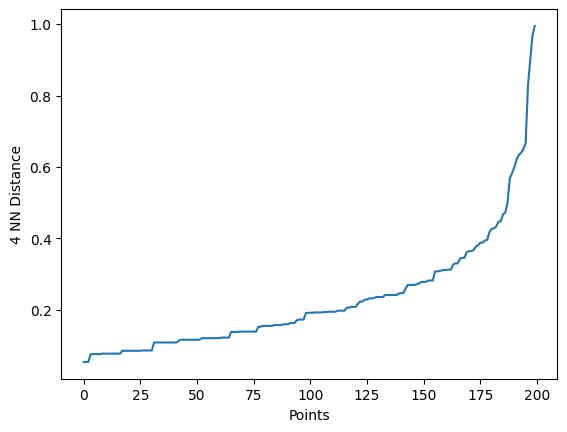

In [315]:
plt.plot(k_dist)
plt.xlabel('Points')
plt.ylabel('4 NN Distance')
plt.show()